In [1]:
from matplotlib.patches import FancyBboxPatch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))

In [3]:
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
media_folder = os.path.join(BASE_DIR, '../cust_churn/media')

csv_files = [f for f in os.listdir(media_folder) if f.endswith('.csv')]
latest_file = max(csv_files, key=lambda x: os.path.getctime(os.path.join(media_folder, x)))
df = pd.read_csv(os.path.join(media_folder, latest_file))
    
do = pd.read_csv('../data/data_train_optimasi.csv')
dd = pd.read_csv('../data/data_train_default.csv')

In [4]:
df = df.drop(['CustomerId', 'Surname', 'Complain'], axis=1)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,SatisfactionScore,CardType,PointEarned
0,674,Spain,Female,38,7,44305.92,3,1,0,22270.98,3,SILVER,344
1,643,France,Male,32,3,93202.21,1,1,1,19213.65,3,GOLD,393
2,682,France,Female,26,2,29183.95,2,1,0,134784.55,3,GOLD,329


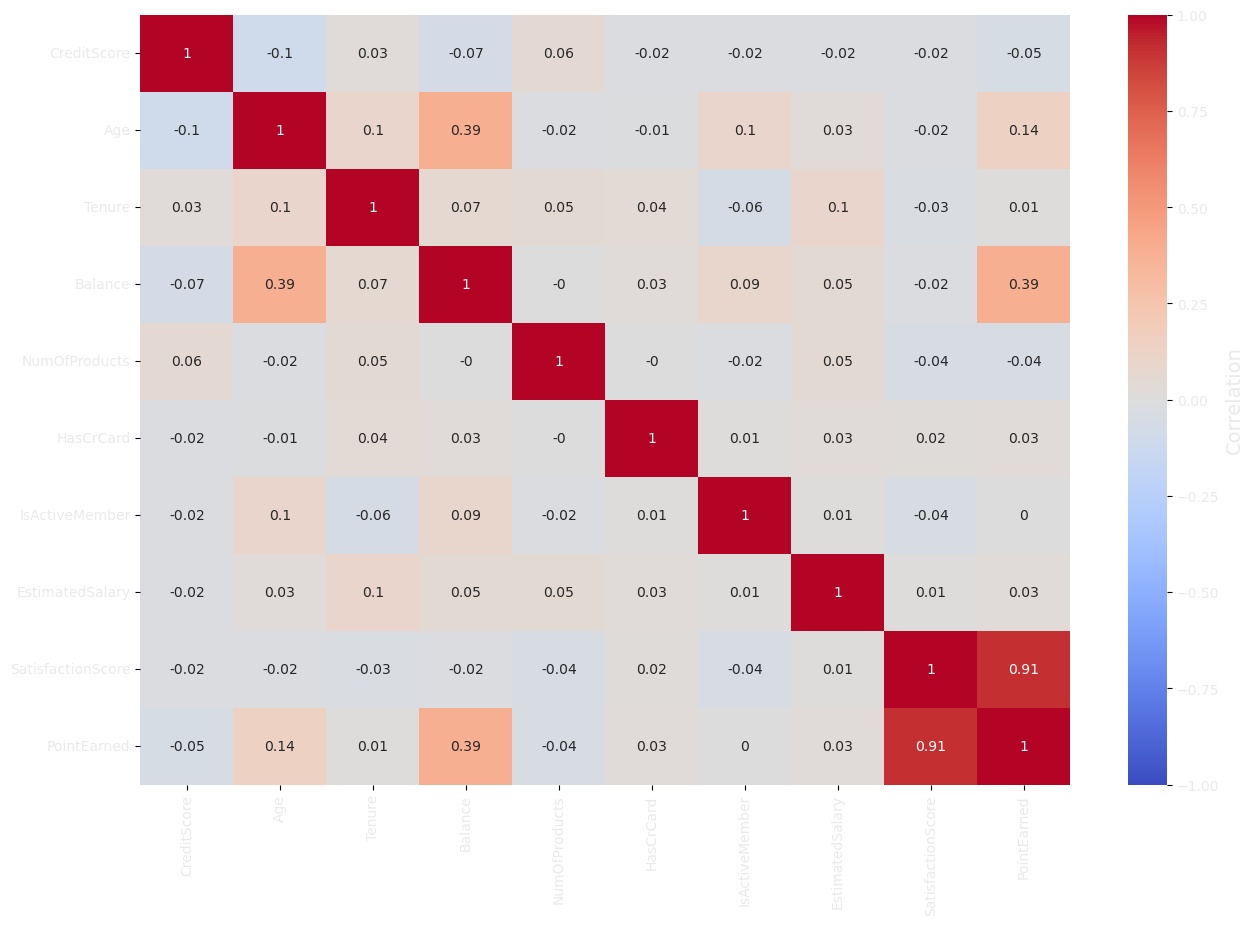

In [5]:
df_numerical = df.select_dtypes(include=[np.number])
corr_matrix = df_numerical.corr().round(2)

plt.figure(figsize=(15, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Correlation'},
    linecolor='#eaeaea'
)

fig = plt.gcf()
fig.patch.set_facecolor('none')

plt.xlabel('', fontsize=12, color='#eaeaea')
plt.ylabel('', fontsize=12, color='#eaeaea')

plt.xticks(fontsize=10, color='#eaeaea')
plt.yticks(fontsize=10, color='#eaeaea')

colorbar = plt.gca().collections[0].colorbar
colorbar.set_label('Correlation', color='#eaeaea', fontsize=14)
colorbar.ax.tick_params(labelcolor='#eaeaea')

save_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'heatmap_korelasi.png')
plt.savefig(save_path, bbox_inches='tight', transparent=True)

plt.show()


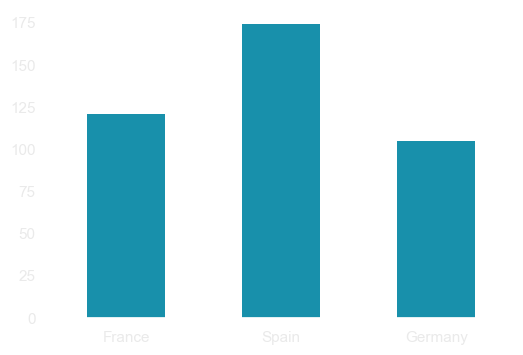

In [6]:
#Customers by Geography
plt.figure(figsize=(6, 4))
sns.set_theme()
sns.countplot(
    x='Geography', 
    hue='Geography', 
    data=df, 
    palette={'France': "#009fc3", 'Spain': "#009fc3", 'Germany': "#009fc3"},
    edgecolor= 'none',
    width=0.5
    )

plt.gca().set_facecolor('none')
fig = plt.gcf()
fig.patch.set_facecolor('none')

plt.xticks(ticks=[0, 1, 2], labels=["France", "Spain", "Germany"], color='#eaeaea')
plt.yticks(color ='#eaeaea')
plt.xlabel("", color='#eaeaea')
plt.ylabel("", color='#eaeaea')

geo_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'cust_Geography.png')
plt.savefig(geo_path, bbox_inches='tight')
plt.show()

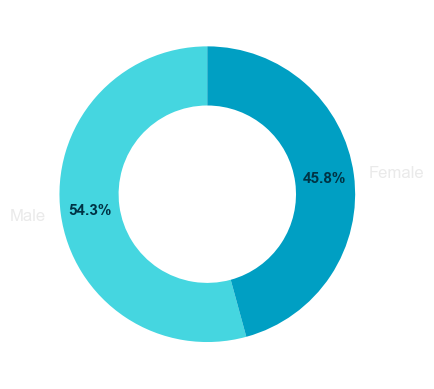

In [7]:
# Hitung jumlah pelanggan per gender
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = {'Female': '#009fc3', 'Male': '#45d6e0'}

# Buat donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=[colors[label] for label in labels],
    startangle=90,
    wedgeprops={'width': 0.4, 'edgecolor': 'none'},
    textprops={'color': '#eaeaea', 'fontsize': 12},
    autopct='%1.1f%%',
    pctdistance=0.80    
)
# Latar belakang transparan
fig.patch.set_facecolor('none')

for autotext in autotexts:
    autotext.set_color('#003344')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

geo_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'cust_Gender.png')
plt.savefig(geo_path, bbox_inches='tight')
plt.show()


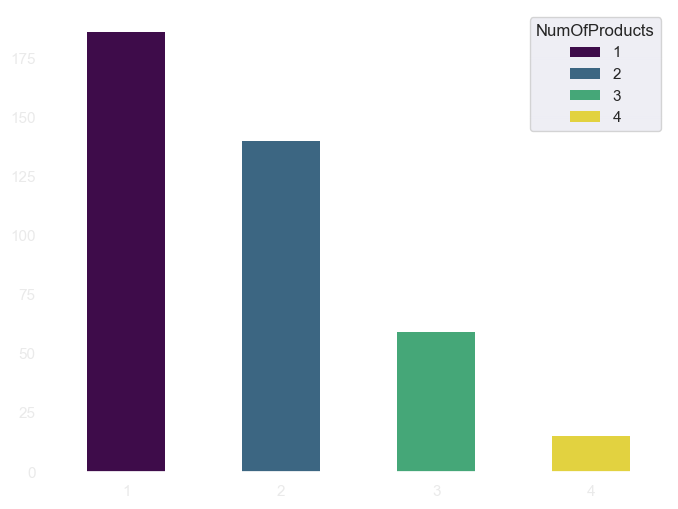

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(
    x='NumOfProducts', 
    hue='NumOfProducts', 
    data=df, 
    palette="viridis",
    edgecolor= 'none',
    width=0.5)

plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='x', colors='#eaeaea')
plt.tick_params(axis='y', colors='#eaeaea')

fig = plt.gcf()
fig.patch.set_facecolor('none')
plt.gca().set_facecolor('none')

geo_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'cust_numPro.png')
plt.savefig(geo_path, bbox_inches='tight')
plt.show()

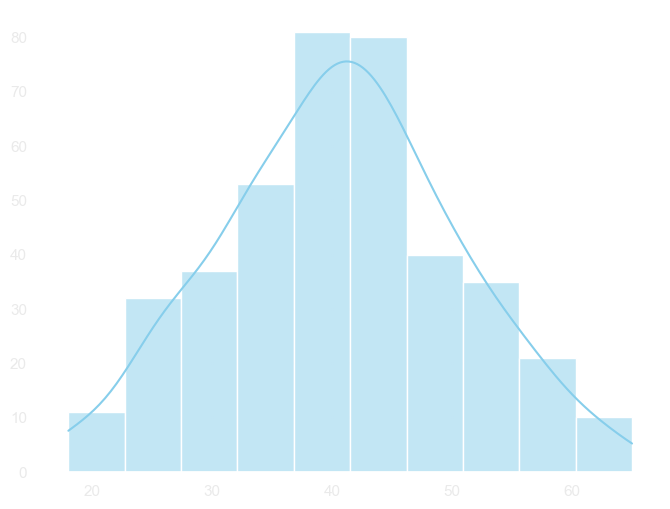

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')

plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='x', colors='#eaeaea')
plt.tick_params(axis='y', colors='#eaeaea')

fig = plt.gcf()
fig.patch.set_facecolor('none')
plt.gca().set_facecolor('none')

geo_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'cust_age.png')
plt.savefig(geo_path, bbox_inches='tight')
plt.show()

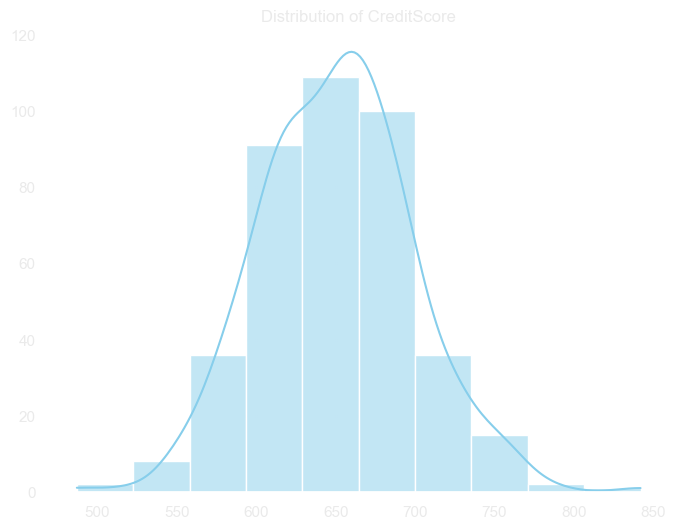

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CreditScore'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of CreditScore", color='#eaeaea')
plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='x', colors='#eaeaea')
plt.tick_params(axis='y', colors='#eaeaea')

fig = plt.gcf()
fig.patch.set_facecolor('none')
plt.gca().set_facecolor('none')

geo_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'CreditScore.png')
plt.savefig(geo_path, bbox_inches='tight')
plt.show()

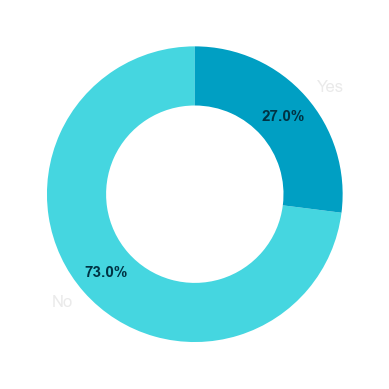

In [11]:
# Hitung jumlah pelanggan per gender
Credit_counts = df['HasCrCard'].value_counts()
labels = ['No', 'Yes'] 
sizes = Credit_counts.values
colors = {0: '#009fc3', 1: '#45d6e0'}

# Buat donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=[colors[label] for label in Credit_counts.index],
    startangle=90,
    wedgeprops={'width': 0.4, 'edgecolor': 'none'},
    textprops={'color': '#eaeaea', 'fontsize': 12},
    autopct='%1.1f%%',
    pctdistance=0.80    
)
# Latar belakang transparan
fig.patch.set_facecolor('none')

for autotext in autotexts:
    autotext.set_color('#003344')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

geo_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'cust_credit.png')
plt.savefig(geo_path, bbox_inches='tight')
plt.show()


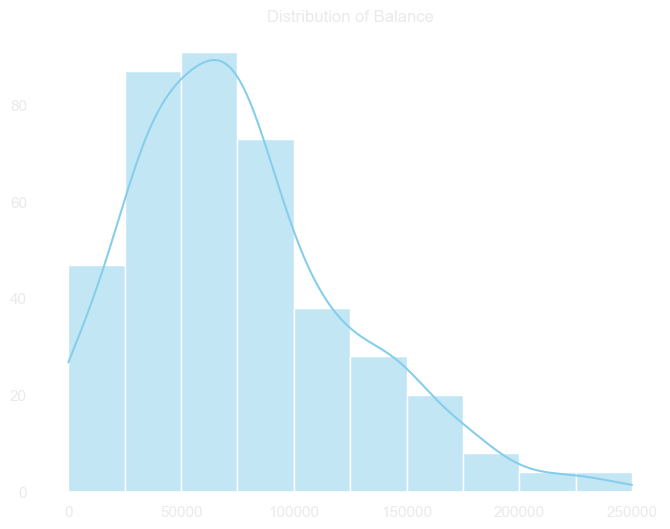

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Balance'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Balance", color='#eaeaea')
plt.xlabel("")
plt.ylabel("")
plt.tick_params(axis='x', colors='#eaeaea')
plt.tick_params(axis='y', colors='#eaeaea')

fig = plt.gcf()
fig.patch.set_facecolor('none')
plt.gca().set_facecolor('none')

geo_path = os.path.join(BASE_DIR, 'cust_churn', 'churnapp', 'static', 'img', 'Balance.png')
plt.savefig(geo_path, bbox_inches='tight')
plt.show()